### aim: Fig-means-extremes, Table-means-clim-and-trend Table-extremes-clim-and-trend

### associated scripts:

- means timeseries made in windEval/plottingCode/extract_ts.py  and extract_ts_2019.py which needs to be run in the pyxr env, which has a UKESM-compatible xarray
- trends calculated in windEval/plottingCode/trend_table.py

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

## Calculate seasonal mean climatology (for table)

these seasonal climatologies are calculated in Fig-spat-clim

In [4]:
sdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'


merradjf = xr.open_dataset(f'{sdir}/MERRA_djf_1980-2019.nc')
merrajja = xr.open_dataset(f'{sdir}/MERRA_jja_1980-2019.nc')
merrason = xr.open_dataset(f'{sdir}/MERRA_son_1980-2019.nc')
merramam = xr.open_dataset(f'{sdir}/MERRA_mam_1980-2019.nc')
merrafy = xr.open_dataset(f'{sdir}/MERRA_fy_1980-2019.nc')

doedjf = xr.open_dataset(f'{sdir}/NCEP-DOE_djf_1980-2019.nc')
doejja = xr.open_dataset(f'{sdir}/NCEP-DOE_jja_1980-2019.nc')
doeson = xr.open_dataset(f'{sdir}/NCEP-DOE_son_1980-2019.nc')
doemam = xr.open_dataset(f'{sdir}/NCEP-DOE_mam_1980-2019.nc')
doefy = xr.open_dataset(f'{sdir}/NCEP-DOE_fy_1980-2019.nc')

ncardjf = xr.open_dataset(f'{sdir}/NCEP-NCAR_djf_1980-2019.nc')
ncarjja = xr.open_dataset(f'{sdir}/NCEP-NCAR_jja_1980-2019.nc')
ncarson = xr.open_dataset(f'{sdir}/NCEP-NCAR_son_1980-2019.nc')
ncarmam = xr.open_dataset(f'{sdir}/NCEP-NCAR_mam_1980-2019.nc')
ncarfy = xr.open_dataset(f'{sdir}/NCEP-NCAR_fy_1980-2019.nc')

eradjf = xr.open_dataset(f'{sdir}/ERA5_djf_1980-2019.nc')
erajja = xr.open_dataset(f'{sdir}/ERA5_jja_1980-2019.nc')
erason = xr.open_dataset(f'{sdir}/ERA5_son_1980-2019.nc')
eramam = xr.open_dataset(f'{sdir}/ERA5_mam_1980-2019.nc')
erafy = xr.open_dataset(f'{sdir}/ERA5_fy_1980-2019.nc')

ukesmdjf = xr.open_dataset(f'{sdir}/UKESMEM_djf_1980-2019.nc')
ukesmjja = xr.open_dataset(f'{sdir}/UKESMEM_jja_1980-2019.nc')
ukesmson = xr.open_dataset(f'{sdir}/UKESMEM_son_1980-2019.nc')
ukesmmam = xr.open_dataset(f'{sdir}/UKESMEM_mam_1980-2019.nc')
ukesmfy = xr.open_dataset(f'{sdir}/UKESMEM_fy_1980-2019.nc')

JRAdjf = xr.open_dataset(f'{sdir}/JRA_djf_1980-2019.nc')
JRAjja = xr.open_dataset(f'{sdir}/JRA_jja_1980-2019.nc')
JRAson = xr.open_dataset(f'{sdir}/JRA_son_1980-2019.nc')
JRAmam = xr.open_dataset(f'{sdir}/JRA_mam_1980-2019.nc')
JRAfy = xr.open_dataset(f'{sdir}/JRA_fy_1980-2019.nc')

In [5]:
savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
cdomask = xr.open_dataset(savenam)
cdomask
tmask = cdomask.tmask
sh = False
if sh:
    plt.figure()
    plt.pcolormesh(tmask)
    plt.figure()
    plt.pcolormesh(erafyws)

In [6]:
ex = False
if ex:
    data = np.zeros([5,6])
    
    data[0,0] = (np.average(ncarfy.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[1,0] = (np.average(ncardjf.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[2,0] = (np.average(ncarmam.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[3,0] = (np.average(ncarjja.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[4,0] = (np.average(ncarson.wspd10m[30:50,:], weights=tmask[30:50,:]))

    data[0,1] = (np.average(doefy.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[1,1] = (np.average(doedjf.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[2,1] = (np.average(doemam.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[3,1] = (np.average(doejja.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[4,1] = (np.average(doeson.wspd10m[30:50,:], weights=tmask[30:50,:]))

    data[0,2] = (np.average(merrafy.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[1,2] = (np.average(merradjf.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[2,2] = (np.average(merramam.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[3,2] = (np.average(merrajja.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[4,2] = (np.average(merrason.wspd10m[30:50,:], weights=tmask[30:50,:]))

    data[0,3] = (np.average(JRAfy.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[1,3] = (np.average(JRAdjf.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[2,3] = (np.average(JRAmam.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[3,3] = (np.average(JRAjja.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[4,3] = (np.average(JRAson.wspd10m[30:50,:], weights=tmask[30:50,:]))    

    data[0,4] = (np.average(erafy.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[1,4] = (np.average(eradjf.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[2,4] = (np.average(eramam.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[3,4] = (np.average(erajja.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[4,4] = (np.average(erason.wspd10m[30:50,:], weights=tmask[30:50,:]))
    
    data[0,5] = (np.average(ukesmfy.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[1,5] = (np.average(ukesmdjf.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[2,5] = (np.average(ukesmmam.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[3,5] = (np.average(ukesmjja.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[4,5] = (np.average(ukesmson.wspd10m[30:50,:], weights=tmask[30:50,:]))   

    df = pd.DataFrame(data, columns=['NCEP-NCAR','NCEP-DOE','MERRA','JRA3Q','ERA5','UKESMEM'],\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])
    df.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
    df.to_csv(f'./plts/allmod_mn_windspeed_1980-2019_60-40S.csv')

## This code calculates mean of all winds above 95% and below 5%

The extreme winds are calculated as follows:
For each day in a year, the 95% of all winds below 30S is calculated and a weighted average is taken of winds above this percentile. For a seasonal extreme winds for a given year, the mean of this timeseries is taken. 



In [7]:
def weighted_quantile(values, quantiles, sample_weight=None, 
                      values_sorted=False, old_style=False):
    """ Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)

In [8]:

ex = False

def get_extrema(tvar,yr):
    tn = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
    cdomask = xr.open_dataset(tn)
    adir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/'    
    w = xr.open_dataset(f'{adir}/{tvar}/{tvar}_wind_daily_1x1_{yr}.nc')

    at95 = np.zeros([len(w.time_counter)])
    above95 = np.zeros([len(w.time_counter)])
    above95wt = np.zeros([len(w.time_counter)])
    tmask = cdomask.tmask[30:50,:].values

    for i in range(0,len(w.time_counter)):

        twspd = w.wspd10m[i,30:50,:]
        where0 = np.where(tmask == 0)
        twspd2 = np.copy(twspd)
        twspd2[np.where(tmask == 0)] = np.nan
        perc95 = weighted_quantile(np.ravel(twspd), 0.95, \
                                sample_weight=np.ravel(tmask))

        tmask2 = np.copy(tmask)
        ts = twspd2[twspd2>perc95]
        q = np.where(twspd2 < perc95)
        tmask2[q] = 0

        at95[i] = perc95
        above95wt[i] = np.average(np.ravel(twspd), weights = np.ravel(tmask2))
        above95[i] = np.nanmean(twspd2[twspd2>perc95])

    savenam = f'{adir}/intProc/{tvar}_windex_{yr}.nc'
    print(savenam)
    data_vars = {'at95':(['time_counter'], at95,
    {'units': 'm/s',
    'long_name':'daily 95% of winds south of 40S to 60s'}),
                 'above95':(['time_counter'], above95,
    {'units': '',
    'long_name':''}),
                 'above95wt':(['time_counter'], above95wt,
    {'units': '',
    'long_name':'mean of everything above 95wt'}),
    }
    # define coordinates
    coords = {'time_counter': (['time_counter'], w.time_counter),
            }
    # define global attributes
    attrs = {'made in':'windEval/plottingCode/Fig-means-extremes.ipynb',
    'desc': ''
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)

tits = ['UKESMEM']#,'NCEP-DOE']#,'ERA5','NCEP-NCAR','UKESM']
tits = ['UKESMm2','UKESMm3']
if ex:

    for yr in range(1940,2100):
        for t in tits:
            try:
                get_extrema(t,yr)
            except:
                print(f'haha no for {t}, {yr}')

            


In [9]:

ex = False

def get_lowextrema(tvar,yr):
    tn = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
    cdomask = xr.open_dataset(tn)
    adir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/'    
    w = xr.open_dataset(f'{adir}/{tvar}/{tvar}_wind_daily_1x1_{yr}.nc')

    at95 = np.zeros([len(w.time_counter)])
    above95 = np.zeros([len(w.time_counter)])
    above95wt = np.zeros([len(w.time_counter)])
    tmask = cdomask.tmask[30:50,:].values

    for i in range(0,len(w.time_counter)):

        twspd = w.wspd10m[i,30:50,:]
        where0 = np.where(tmask == 0)
        twspd2 = np.copy(twspd)
        twspd2[np.where(tmask == 0)] = np.nan
        perc05 = weighted_quantile(np.ravel(twspd), 0.05, \
                                sample_weight=np.ravel(tmask))

        tmask2 = np.copy(tmask)
        ts = twspd2[twspd2<perc05]
        q = np.where(twspd2 > perc05)
        tmask2[q] = 0

        at95[i] = perc05
        above95wt[i] = np.average(np.ravel(twspd), weights = np.ravel(tmask2))
        above95[i] = np.nanmean(twspd2[twspd2<perc05])

    savenam = f'{adir}/intProc/{tvar}_windlowex_{yr}.nc'
    print(savenam)
    data_vars = {'at05':(['time_counter'], at95,
    {'units': 'm/s',
    'long_name':'daily 05% of winds south of 40S to 60s'}),
                 
                 'below05':(['time_counter'], above95,
    {'units': '',
    'long_name':'mean of everything below 05'}),
                 'below05wt':(['time_counter'], above95wt,
    {'units': '',
    'long_name':'mean of everything below 05wt'}),
    }
    # define coordinates
    coords = {'time_counter': (['time_counter'], w.time_counter),
            }
    # define global attributes
    attrs = {'made in':'windEval/plottingCode/Fig-means-extremes.ipynb',
    'desc': ''
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)

tits = ['JRA','ERA5','NCEP-NCAR','UKESM','MERRA']
tits = ['UKESMEM']
tits = ['UKESMm2','UKESMm3']

if ex:

    for yr in range(1940,2024):
        for t in tits:
            try:
                get_lowextrema(t,yr)
            except:
                print(f'haha no for {t}, {yr}')

            


## claculate seasonal extreme climatology (for table)

In [10]:
def make_exlist(prod,yrst = 1980, yrend = 2019, \
                 baseDir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{prod}_windex_{yrs[i]}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist





In [11]:
ex = False
if ex:
    
    MERRAex = xr.open_mfdataset(make_exlist('MERRA'))
    ERA5ex = xr.open_mfdataset(make_exlist('ERA5'))
    NCEPDOEex = xr.open_mfdataset(make_exlist('NCEP-DOE'))
    NCEPNCARex = xr.open_mfdataset(make_exlist('NCEP-NCAR'))
    UKESMex = xr.open_mfdataset(make_exlist('UKESM'))
    UKESMm2ex = xr.open_mfdataset(make_exlist('UKESMm2'))
    UKESMm3ex = xr.open_mfdataset(make_exlist('UKESMm3'))
    JRAex = xr.open_mfdataset(make_exlist('JRA'))

    #tdarx = [ERA5ex, NCEPNCARex, MERRAex, NCEPDOEex, UKESMex, JRAex]

    UKESMex_FY = (UKESMex.above95wt.mean(dim = ['time_counter']).values)
    UKESMex_DJF = (UKESMex.above95wt.sel(time_counter=(UKESMex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
    UKESMex_MAM = (UKESMex.above95wt.sel(time_counter=(UKESMex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
    UKESMex_JJA = (UKESMex.above95wt.sel(time_counter=(UKESMex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
    UKESMex_SON = (UKESMex.above95wt.sel(time_counter=(UKESMex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)

    UKESMm2ex_FY = (UKESMm2ex.above95wt.mean(dim = ['time_counter']).values)
    UKESMm2ex_DJF = (UKESMm2ex.above95wt.sel(time_counter=(UKESMm2ex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
    UKESMm2ex_MAM = (UKESMm2ex.above95wt.sel(time_counter=(UKESMm2ex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
    UKESMm2ex_JJA = (UKESMm2ex.above95wt.sel(time_counter=(UKESMm2ex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
    UKESMm2ex_SON = (UKESMm2ex.above95wt.sel(time_counter=(UKESMm2ex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)
    
    UKESMm3ex_FY = (UKESMm3ex.above95wt.mean(dim = ['time_counter']).values)
    UKESMm3ex_DJF = (UKESMm3ex.above95wt.sel(time_counter=(UKESMm3ex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
    UKESMm3ex_MAM = (UKESMm3ex.above95wt.sel(time_counter=(UKESMm3ex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
    UKESMm3ex_JJA = (UKESMm3ex.above95wt.sel(time_counter=(UKESMm3ex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
    UKESMm3ex_SON = (UKESMm3ex.above95wt.sel(time_counter=(UKESMm3ex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)
    
    ERA5ex_FY = (ERA5ex.above95wt.mean(dim = ['time_counter']).values)
    ERA5ex_DJF = (ERA5ex.above95wt.sel(time_counter=(ERA5ex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
    ERA5ex_MAM = (ERA5ex.above95wt.sel(time_counter=(ERA5ex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
    ERA5ex_JJA = (ERA5ex.above95wt.sel(time_counter=(ERA5ex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
    ERA5ex_SON = (ERA5ex.above95wt.sel(time_counter=(ERA5ex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)

    NCEPDOEex_FY = (NCEPDOEex.above95wt.mean(dim = ['time_counter']).values)
    NCEPDOEex_DJF = (NCEPDOEex.above95wt.sel(time_counter=(NCEPDOEex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
    NCEPDOEex_MAM = (NCEPDOEex.above95wt.sel(time_counter=(NCEPDOEex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
    NCEPDOEex_JJA = (NCEPDOEex.above95wt.sel(time_counter=(NCEPDOEex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
    NCEPDOEex_SON = (NCEPDOEex.above95wt.sel(time_counter=(NCEPDOEex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)

    NCEPNCARex_FY = (NCEPNCARex.above95wt.mean(dim = ['time_counter']).values)
    NCEPNCARex_DJF = (NCEPNCARex.above95wt.sel(time_counter=(NCEPNCARex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
    NCEPNCARex_MAM = (NCEPNCARex.above95wt.sel(time_counter=(NCEPNCARex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
    NCEPNCARex_JJA = (NCEPNCARex.above95wt.sel(time_counter=(NCEPNCARex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
    NCEPNCARex_SON = (NCEPNCARex.above95wt.sel(time_counter=(NCEPNCARex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)

    MERRAex_FY = (MERRAex.above95wt.mean(dim = ['time_counter']).values)
    MERRAex_DJF = (MERRAex.above95wt.sel(time_counter=(MERRAex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
    MERRAex_MAM = (MERRAex.above95wt.sel(time_counter=(MERRAex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
    MERRAex_JJA = (MERRAex.above95wt.sel(time_counter=(MERRAex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
    MERRAex_SON = (MERRAex.above95wt.sel(time_counter=(MERRAex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)

    JRAex_FY = (JRAex.above95wt.mean(dim = ['time_counter']).values)
    JRAex_DJF = (JRAex.above95wt.sel(time_counter=(JRAex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
    JRAex_MAM = (JRAex.above95wt.sel(time_counter=(JRAex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
    JRAex_JJA = (JRAex.above95wt.sel(time_counter=(JRAex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
    JRAex_SON = (JRAex.above95wt.sel(time_counter=(JRAex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)
  
    data = np.zeros([5,8])
    
    data[0,0] = NCEPNCARex_FY
    data[1,0] = NCEPNCARex_DJF
    data[2,0] = NCEPNCARex_MAM
    data[3,0] = NCEPNCARex_JJA
    data[4,0] = NCEPNCARex_SON
    
    data[0,1] = NCEPDOEex_FY
    data[1,1] = NCEPDOEex_DJF
    data[2,1] = NCEPDOEex_MAM
    data[3,1] = NCEPDOEex_JJA
    data[4,1] = NCEPDOEex_SON
    
    data[0,2] = MERRAex_FY
    data[1,2] = MERRAex_DJF
    data[2,2] = MERRAex_MAM
    data[3,2] = MERRAex_JJA
    data[4,2] = MERRAex_SON

    data[0,3] = JRAex_FY
    data[1,3] = JRAex_DJF
    data[2,3] = JRAex_MAM
    data[3,3] = JRAex_JJA
    data[4,3] = JRAex_SON
    
    data[0,4] = ERA5ex_FY
    data[1,4] = ERA5ex_DJF
    data[2,4] = ERA5ex_MAM
    data[3,4] = ERA5ex_JJA
    data[4,4] = ERA5ex_SON

    data[0,5] = UKESMex_FY
    data[1,5] = UKESMex_DJF
    data[2,5] = UKESMex_MAM
    data[3,5] = UKESMex_JJA
    data[4,5] = UKESMex_SON 

    data[0,6] = UKESMm2ex_FY
    data[1,6] = UKESMm2ex_DJF
    data[2,6] = UKESMm2ex_MAM
    data[3,6] = UKESMm2ex_JJA
    data[4,6] = UKESMm2ex_SON 

    data[0,7] = UKESMm3ex_FY
    data[1,7] = UKESMm3ex_DJF
    data[2,7] = UKESMm3ex_MAM
    data[3,7] = UKESMm3ex_JJA
    data[4,7] = UKESMm3ex_SON 

    
    
    #n = ['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM']

    df = pd.DataFrame(data, columns=['NCEP-NCAR','NCEP-DOE','MERRA','JRA3Q','ERA5','UKESM','UKESMm2','UKESMm3'],\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])
    df.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
    df.to_csv(f'./plts/allmod_weightabove95ex_windspeed_1980-2019_60-40S.csv')
    print('done')

## low extremes

In [12]:
ex = False

def make_lowexlist(prod,yrst = 1980, yrend = 2019, \
                 baseDir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{prod}_windlowex_{yrs[i]}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

if ex:
    MERRAex = xr.open_mfdataset(make_lowexlist('MERRA'))
    ERA5ex = xr.open_mfdataset(make_lowexlist('ERA5'))
    NCEPNCARex = xr.open_mfdataset(make_lowexlist('NCEP-NCAR'))
    UKESMex = xr.open_mfdataset(make_lowexlist('UKESM'))
    UKESMm2ex = xr.open_mfdataset(make_lowexlist('UKESMm2'))
    UKESMm3ex = xr.open_mfdataset(make_lowexlist('UKESMm3'))
    JRAex = xr.open_mfdataset(make_lowexlist('JRA'))

    tdarx = [ERA5ex, NCEPNCARex, MERRAex, NCEPDOEex, UKESMex, JRAex]

    UKESMex_FY = (UKESMex.below05wt.mean(dim = ['time_counter']).values)
    UKESMex_DJF = (UKESMex.below05wt.sel(time_counter=(UKESMex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
    UKESMex_MAM = (UKESMex.below05wt.sel(time_counter=(UKESMex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
    UKESMex_JJA = (UKESMex.below05wt.sel(time_counter=(UKESMex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
    UKESMex_SON = (UKESMex.below05wt.sel(time_counter=(UKESMex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)

    UKESMm2ex_FY = (UKESMm2ex.below05wt.mean(dim = ['time_counter']).values)
    UKESMm2ex_DJF = (UKESMm2ex.below05wt.sel(time_counter=(UKESMm2ex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
    UKESMm2ex_MAM = (UKESMm2ex.below05wt.sel(time_counter=(UKESMm2ex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
    UKESMm2ex_JJA = (UKESMm2ex.below05wt.sel(time_counter=(UKESMm2ex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
    UKESMm2ex_SON = (UKESMm2ex.below05wt.sel(time_counter=(UKESMm2ex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)    
    
    UKESMm3ex_FY = (UKESMm3ex.below05wt.mean(dim = ['time_counter']).values)
    UKESMm3ex_DJF = (UKESMm3ex.below05wt.sel(time_counter=(UKESMm3ex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
    UKESMm3ex_MAM = (UKESMm3ex.below05wt.sel(time_counter=(UKESMm3ex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
    UKESMm3ex_JJA = (UKESMm3ex.below05wt.sel(time_counter=(UKESMm3ex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
    UKESMm3ex_SON = (UKESMm3ex.below05wt.sel(time_counter=(UKESMm3ex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)    

    ERA5ex_FY = (ERA5ex.below05wt.mean(dim = ['time_counter']).values)
    ERA5ex_DJF = (ERA5ex.below05wt.sel(time_counter=(ERA5ex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
    ERA5ex_MAM = (ERA5ex.below05wt.sel(time_counter=(ERA5ex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
    ERA5ex_JJA = (ERA5ex.below05wt.sel(time_counter=(ERA5ex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
    ERA5ex_SON = (ERA5ex.below05wt.sel(time_counter=(ERA5ex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)

    NCEPNCARex_FY = (NCEPNCARex.below05wt.mean(dim = ['time_counter']).values)
    NCEPNCARex_DJF = (NCEPNCARex.below05wt.sel(time_counter=(NCEPNCARex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
    NCEPNCARex_MAM = (NCEPNCARex.below05wt.sel(time_counter=(NCEPNCARex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
    NCEPNCARex_JJA = (NCEPNCARex.below05wt.sel(time_counter=(NCEPNCARex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
    NCEPNCARex_SON = (NCEPNCARex.below05wt.sel(time_counter=(NCEPNCARex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)

    MERRAex_FY = (MERRAex.below05wt.mean(dim = ['time_counter']).values)
    MERRAex_DJF = (MERRAex.below05wt.sel(time_counter=(MERRAex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
    MERRAex_MAM = (MERRAex.below05wt.sel(time_counter=(MERRAex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
    MERRAex_JJA = (MERRAex.below05wt.sel(time_counter=(MERRAex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
    MERRAex_SON = (MERRAex.below05wt.sel(time_counter=(MERRAex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)

    JRAex_FY = (JRAex.below05wt.mean(dim = ['time_counter']).values)
    JRAex_DJF = (JRAex.below05wt.sel(time_counter=(JRAex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
    JRAex_MAM = (JRAex.below05wt.sel(time_counter=(JRAex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
    JRAex_JJA = (JRAex.below05wt.sel(time_counter=(JRAex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
    JRAex_SON = (JRAex.below05wt.sel(time_counter=(JRAex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)


    data = np.zeros([5,8])

    data[0,0] = NCEPNCARex_FY
    data[1,0] = NCEPNCARex_DJF
    data[2,0] = NCEPNCARex_MAM
    data[3,0] = NCEPNCARex_JJA
    data[4,0] = NCEPNCARex_SON


    data[0,2] = MERRAex_FY
    data[1,2] = MERRAex_DJF
    data[2,2] = MERRAex_MAM
    data[3,2] = MERRAex_JJA
    data[4,2] = MERRAex_SON

    data[0,3] = JRAex_FY
    data[1,3] = JRAex_DJF
    data[2,3] = JRAex_MAM
    data[3,3] = JRAex_JJA
    data[4,3] = JRAex_SON

    data[0,4] = ERA5ex_FY
    data[1,4] = ERA5ex_DJF
    data[2,4] = ERA5ex_MAM
    data[3,4] = ERA5ex_JJA
    data[4,4] = ERA5ex_SON

    data[0,5] = UKESMex_FY
    data[1,5] = UKESMex_DJF
    data[2,5] = UKESMex_MAM
    data[3,5] = UKESMex_JJA
    data[4,5] = UKESMex_SON 

    data[0,6] = UKESMm2ex_FY
    data[1,6] = UKESMm2ex_DJF
    data[2,6] = UKESMm2ex_MAM
    data[3,6] = UKESMm2ex_JJA
    data[4,6] = UKESMm2ex_SON 

    data[0,7] = UKESMm3ex_FY
    data[1,7] = UKESMm3ex_DJF
    data[2,7] = UKESMm3ex_MAM
    data[3,7] = UKESMm3ex_JJA
    data[4,7] = UKESMm3ex_SON 
    
    df = pd.DataFrame(data, columns=['NCEP-NCAR','NCEP-DOE','MERRA','JRA3Q','ERA5','UKESM','UKESMm2','UKESMm3'],\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])
    df.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
    df.to_csv(f'./plts/allmod_weightbelow05ex_windspeed_1980-2019_60-40S.csv')
    print('done')

## print out the tables of means and extremes

In [13]:
w = pd.read_csv(f'./plts/allmod_mn_windspeed_1980-2019_60-40S.csv')
print(w)
print()
w = pd.read_csv(f'./plts/allmod_weightabove95ex_windspeed_1980-2019_60-40S.csv')
print(w)

  Unnamed: 0  NCEP-NCAR   NCEP-DOE     MERRA     JRA3Q      ERA5   UKESMEM
0  full year   9.002299  10.359714  8.797896  9.284363  9.051943  9.350544
1        DJF   8.373870   9.617426  8.146661  8.643180  8.409101  8.743740
2        MAM   9.106901  10.467496  8.825818  9.348591  9.127803  9.489472
3        JJA   9.424096  10.860016  9.296988  9.734440  9.500867  9.688738
4        SON   9.093366  10.481119  8.910957  9.400305  9.158935  9.480227

  Unnamed: 0  NCEP-NCAR   NCEP-DOE      MERRA      JRA3Q       ERA5  \
0  full year  15.468449  18.546175  15.261471  16.200899  15.608290   
1        DJF  14.567467  17.410640  14.294108  15.259261  14.748195   
2        MAM  15.653359  18.747951  15.342449  16.330485  15.759609   
3        JJA  16.108885  19.379755  16.042890  16.907042  16.232183   
4        SON  15.527590  18.625617  15.348986  16.289861  15.677566   

       UKESM    UKESMm2    UKESMm3  
0  15.941365  15.935824  15.919607  
1  15.011784  15.056928  14.984451  
2  16.05663

## trend function

In [14]:

import pymannkendall as mk
from scipy import stats

def give_trends(ts_y):

    ts_x = np.arange(0,len(ts_y))
    trend, h, mk_p, z, Tau, s, var_s, mk_slope, intercept = mk.original_test(ts_y)
    lin_slope, intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_p, lin_slope, lin_p


## Calculate trends in means (for table)

get timeseries out plottingCode/extract_ts_2019.py

In [15]:
ex = False
if ex:
    
    merra_ts = xr.open_dataset(f'{sdir}/MERRA_40-60S_mean_wspd_ts_1980-2019.nc')
    era_ts = xr.open_dataset(f'{sdir}/ERA5_40-60S_mean_wspd_ts_1980-2019.nc')
    doe_ts = xr.open_dataset(f'{sdir}/NCEP-DOE_40-60S_mean_wspd_ts_1980-2019.nc')
    ncar_ts = xr.open_dataset(f'{sdir}/NCEP-NCAR_40-60S_mean_wspd_ts_1980-2019.nc')
    ukesm_ts = xr.open_dataset(f'{sdir}/UKESMEM_40-60S_mean_wspd_ts_1980-2019.nc')
    jra_ts = xr.open_dataset(f'{sdir}/JRA_40-60S_mean_wspd_ts_1980-2019.nc')
    
    dss = ['NCEP-NCAR','NCEP-DOE','MERRA','JRA3Q','ERA5','UKESMEM']
    tdar = [ncar_ts, doe_ts, merra_ts, jra_ts, era_ts,   ukesm_ts]

    data = np.zeros([5,6])
    sig = np.zeros([5,6])
    for i in range(0,6):
        print(dss[i])
        ds = dss[i]

        tdat = tdar[i]
        td = tdat
        td = td.wspd10m.groupby('time_counter.year').mean().values
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[0,i] = lin_slope* 10
        sig[0,i] = lin_p


        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'DJF')).\
        groupby('time_counter.year').mean().values
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[1,i] = lin_slope* 10
        sig[1,i] = lin_p


        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'MAM')).\
        groupby('time_counter.year').mean().values
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[2,i] = lin_slope* 10
        sig[2,i] = lin_p

        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'JJA')).\
        groupby('time_counter.year').mean().values
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[3,i] = lin_slope* 10
        sig[3,i] = lin_p

        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'SON')).\
        groupby('time_counter.year').mean().values
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[4,i] = lin_slope * 10
        sig[4,i] = lin_p


        i = i+1


    df = pd.DataFrame(data, columns=['NCEP-NCAR','NCEP-DOE','MERRA','JRA3Q','ERA5','UKESMEM'],\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])
    df2 = pd.DataFrame(sig, columns=['NCEP-NCAR','NCEP-DOE','MERRA','JRA3Q','ERA5','UKESMEM'],\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])

    df.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
    df.to_csv(f'./plts/mn_wspd_trend-1980-2019.csv')
    df2.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
    df2.to_csv(f'./plts/mn_wspd_trendsig-1980-2019.csv')

    print(df)


In [16]:
ex = False

if ex:

    dss = ['NCEP-NCAR','NCEP-DOE','MERRA','JRA3Q','ERA5','UKESMEM']
    tdar = [ncar_ts, doe_ts, merra_ts, jra_ts, era_ts,   ukesm_ts]


    data = np.zeros([5,6])
    sig = np.zeros([5,6])
    for i in range(0,6):
        print(dss[i])
        ds = dss[i]

        tdat = tdar[i]
        td = tdat
        td = td.wspd10m.groupby('time_counter.year').mean().values
        print(len(td))
        td = td[0:20]
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[0,i] = lin_slope* 10
        sig[0,i] = lin_p


        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'DJF')).\
        groupby('time_counter.year').mean().values[0:20]
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[1,i] = lin_slope* 10
        sig[1,i] = lin_p


        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'MAM')).\
        groupby('time_counter.year').mean().values[0:20]
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[2,i] = lin_slope* 10
        sig[2,i] = lin_p

        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'JJA')).\
        groupby('time_counter.year').mean().values[0:20]
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[3,i] = lin_slope* 10
        sig[3,i] = lin_p

        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'SON')).\
        groupby('time_counter.year').mean().values[0:20]
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[4,i] = lin_slope * 10
        sig[4,i] = lin_p


        i = i+1


    df = pd.DataFrame(data, columns=['NCEP-NCAR','NCEP-DOE','MERRA','JRA3Q','ERA5','UKESMEM'],\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])
    df2 = pd.DataFrame(sig, columns=['NCEP-NCAR','NCEP-DOE','MERRA','JRA3Q','ERA5','UKESMEM'],\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])

    df.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
    df.to_csv(f'./plts/mn_wspd_trend-1980-1999.csv')
    df2.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
    df2.to_csv(f'./plts/mn_wspd_trendsig-1980-1999.csv')

## Calculate trends in extremes (for table)

In [17]:
def make_exlist(prod,yrst = 1980, yrend = 2019, \
                 baseDir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{prod}_windex_{yrs[i]}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

MERRAex = xr.open_mfdataset(make_exlist('MERRA'))
ERA5ex = xr.open_mfdataset(make_exlist('ERA5'))
NCEPNCARex = xr.open_mfdataset(make_exlist('NCEP-NCAR'))
UKESMex = xr.open_mfdataset(make_exlist('UKESM'))
UKESMm2ex = xr.open_mfdataset(make_exlist('UKESMm2'))
UKESMm3ex = xr.open_mfdataset(make_exlist('UKESMm3'))
JRAex = xr.open_mfdataset(make_exlist('JRA'))
NCEPDOEex = xr.open_mfdataset(make_exlist('NCEP-DOE'))


In [18]:
ex = False
if ex:
    
    dss = ['NCEP-NCAR','NCEP-DOE','MERRA','JRA','ERA5','UKESM','UKESMm2','UKESMm3']
    tdar = [NCEPNCARex, NCEPDOEex,  MERRAex, JRAex, ERA5ex, UKESMex,UKESMm2ex,UKESMm3ex]

    data = np.zeros([5,8])
    sig = np.zeros([5,8])
    for i in range(0,8):
        print(dss[i])
        ds = dss[i]

        tdat = tdar[i]
        td = tdat
        td = td.above95wt.groupby('time_counter.year').mean().values
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[0,i] = lin_slope* 10
        sig[0,i] = lin_p


        td = tdat
        td = td.above95wt.sel(time_counter=(td['time_counter.season'] == 'DJF')).\
        groupby('time_counter.year').mean().values
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[1,i] = lin_slope* 10
        sig[1,i] = lin_p


        td = tdat
        td = td.above95wt.sel(time_counter=(td['time_counter.season'] == 'MAM')).\
        groupby('time_counter.year').mean().values
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[2,i] = lin_slope* 10
        sig[2,i] = lin_p

        td = tdat
        td = td.above95wt.sel(time_counter=(td['time_counter.season'] == 'JJA')).\
        groupby('time_counter.year').mean().values
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[3,i] = lin_slope* 10
        sig[3,i] = lin_p

        td = tdat
        td = td.above95wt.sel(time_counter=(td['time_counter.season'] == 'SON')).\
        groupby('time_counter.year').mean().values
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[4,i] = lin_slope * 10
        sig[4,i] = lin_p


        i = i+1


    df = pd.DataFrame(data, columns=['NCEP-NCAR','NCEP-DOE','MERRA','JRA3Q','ERA5','UKESM','UKESMm2','UKESMm3'],\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])
    df2 = pd.DataFrame(sig, columns=['NCEP-NCAR','NCEP-DOE','MERRA','JRA3Q','ERA5','UKESM','UKESMm2','UKESMm3'],\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])

    df.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
    df.to_csv(f'./plts/ex_wspd_trend.csv')
    df2.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
    df2.to_csv(f'./plts/ex_wspd_trendsig.csv')

## ok, what tables did we make?

    df.to_csv(f'./plts/allmod_mn_windspeed_1980-2019_60-40S.csv')
    df.to_csv(f'./plts/allmod_weightabove95ex_windspeed_1980-2019_60-40S.csv')
    df.to_csv(f'./plts/mn_wspd_trend.csv')
    df2.to_csv(f'./plts/mn_wspd_trendsig.csv')
    df.to_csv(f'./plts/ex_wspd_trend.csv')
    df2.to_csv(f'./plts/ex_wspd_trendsig.csv')

## FIG-MEAN-EX CODE visualize timeseries of trends/extremes

- means timeseries made in extract_ts.py or extract_ts_2019.py  which needs to be run in the pyxr env, which has a good xarray

- trends calculated in windEval/plottingCode/trend_table.py

## gaussian KDE 

this got put into getKDE.py

In [19]:
ex = False
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm
import numpy as np
import xarray as xr

if ex:

    def custhist(tdat, nbins, start, end, tweights = None):
        #bins = 25
        hist_met_vflx, bins = np.histogram(np.ravel(tdat), bins=nbins,\
                                     range = [start, end], weights=tweights)

        bin_cent = bins + (bins[1]-bins[0])/2
        tot_count = np.sum(hist_met_vflx)


        binsback = bins
        bin_cent = bin_cent[0:nbins]
        histback = hist_met_vflx/tot_count

        return binsback, bin_cent, histback

    def make_yearlist_prod(yrst, yrend, prod = 'ERA5'):

        baseDir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/'

        yrs = np.arange(yrst,yrend+1,1)
        ylist = []
        for i in range(0,len(yrs)):
            ty = f'{baseDir}/{prod}/{prod}_wind_daily_1x1_{yrs[i]}.nc'
            t2 = glob.glob(ty)
            #print(t2)
            ylist.append(t2[0])
        return ylist

    def get_gaussian_kde(prod = 'ERA5', seas = 'FY', yst = 1940, yen = 1949, xmi = 0, xma = 25):

        tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
        savenam = f'KDE-{prod}-{seas}-{yst}-{yen}.nc'#seas
        print(savenam)

        yl = make_yearlist_prod(yst, yen, prod)
        td = xr.open_mfdataset(yl)

        if seas == 'FY':
            q = td.wspd10m.isel(lat = slice(30,50))
            masksiz = (len(q.time_counter))

        else:
            q = td.wspd10m.sel(time_counter=(td['time_counter.season'] == seas)).isel(lat = slice(30,50))
            masksiz = (len(q.time_counter))
            print(masksiz)

        tval = q.values

        cdomask = xr.open_dataset('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_krg.nc')
        tmask = cdomask.aream2.mean(dim = 'time_counter').isel(lat = slice(30,50)).values

        y = (np.shape(tmask)[0])
        x = (np.shape(tmask)[1])
        timask = np.zeros([masksiz,y,x])
        for i in range(0,masksiz):
            timask[i,:,:] = tmask

        kde_x = np.linspace(xmi, xma, 100)
        kde = gaussian_kde(np.ravel(tval), weights=np.ravel(timask))
        kde_val = kde(kde_x)

        binsback, bin_cent, histback, = custhist(np.ravel(tval), 100, xmi, xma, tweights = np.ravel(timask))


        data_vars = {'kde':(['kde_x'],kde_val),
                            'hist':(['hist_x'],histback),
        }
        # define coordinates
        coords = {'kde_x': (['kde_x'], kde_x),
                  'hist_x': (['hist_x'], bin_cent),

                 }
        # define global attributes
        attrs = {'made in':'~/scratch/windEval/plottingCode/getKDE.py',
        'desc': 'yearly medusa files, saving only variables of interest'
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(f'{tdir}{savenam}')

        return 


    

    prods = ['UKESM','ERA5','NCEP-DOE','NCEP-NCAR','MERRA']
    prods = ['JRA']#UKESM','ERA5','NCEP-DOE','NCEP-NCAR','MERRA']
    prods = ['UKESMm2','UKESMm3']
    yrs = [1980]
    seass = ['FY','DJF']#,'JJA',]

    for prod in prods:
        for yr in yrs:
            for s in seass:
                print(s)
                yre = yr+39
                get_gaussian_kde(prod, seas = s, yst = yr, yen = yre, xmi = 0, xma = 20)





In [20]:
def moving_average(timeseries, n = 3):
    # Ensure n is valid and doesn't exceed the length of the timeseries
    if n <= 0 or n > len(timeseries):
        raise ValueError("Window size n must be between 1 and the length of the timeseries.")
    
    # Compute the n-point moving average
    return np.convolve(timeseries, np.ones(n) / n, mode='valid')

# Example usage:
timeseries = [10, 20, 30, 40, 50, 60, 70]
n = 3  # Adjust the window size here
filtered_timeseries = moving_average(timeseries, n)

## figure

## get extreme ts and calculate ukesm extreme trends by hand (mean of 3 trends of 3 ensemble members, mean of means.

    - means don't change much, trends do

    - I checked the lin p and they are not significant

In [21]:
MERRAex = xr.open_mfdataset(make_exlist('MERRA'))
ERA5ex = xr.open_mfdataset(make_exlist('ERA5'))
NCEPNCARex = xr.open_mfdataset(make_exlist('NCEP-NCAR'))
JRAex = xr.open_mfdataset(make_exlist('JRA'))

UKESMex = xr.open_mfdataset(make_exlist('UKESM'))
UKESMm2ex = xr.open_mfdataset(make_exlist('UKESMm2'))
UKESMm3ex = xr.open_mfdataset(make_exlist('UKESMm3'))


In [22]:
u1 = UKESMex.above95wt.sel(time_counter=(UKESMex['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().values
u2 = UKESMm2ex.above95wt.sel(time_counter=(UKESMm2ex['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().values
u3 = UKESMm3ex.above95wt.sel(time_counter=(UKESMm3ex['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().values

u1m_fh = np.mean(u1[0:20])
mk_slope, mk_p, lin_slope, lin_p = give_trends(u1[0:20])
u1t_fh = lin_slope*10

u2m_fh = np.mean(u2[0:20])
mk_slope, mk_p, lin_slope, lin_p = give_trends(u2[0:20])
u2t_fh = lin_slope*10

u3m_fh = np.mean(u3[0:20])
mk_slope, mk_p, lin_slope, lin_p = give_trends(u3[0:20])
u3t_fh = lin_slope*10

u1m_ft = np.mean(u1)
mk_slope, mk_p, lin_slope, lin_p = give_trends(u1)
u1t_ft = lin_slope*10

u2m_ft = np.mean(u2)
mk_slope, mk_p, lin_slope, lin_p = give_trends(u2)
u2t_ft = lin_slope*10

u3m_ft = np.mean(u3)
mk_slope, mk_p, lin_slope, lin_p = give_trends(u3)
u3t_ft = lin_slope*10


print(f'{u1m_fh}, {u2m_fh}, {u3m_fh}')
DJFukm_fh = (u1m_fh + u2m_fh +u3m_fh)/3
print(DJFukm_fh)

print(f'{u1m_ft}, {u2m_ft}, {u3m_ft}')
DJFukm_ft = (u1m_ft + u2m_ft +u3m_ft)/3
print(DJFukm_ft)

print()
print(f'{u1t_fh}, {u2t_fh}, {u3t_fh}')
DJFukt_fh = (u1t_fh + u2t_fh +u3t_fh)/3
print(DJFukt_fh)

print(f'{u1t_ft}, {u2t_ft}, {u3t_ft}')
DJFukt_ft = (u1t_ft + u2t_ft +u3t_ft)/3
print(DJFukt_ft)

14.961970001115168, 15.028231598838866, 14.968418796135088
14.986206798696374
15.011783967032505, 15.05692810852023, 14.984451418770723
15.017721164774485

0.11937447745771282, 0.049017157358356975, 0.017711287859199815
0.0620343075584232
0.0619623161209048, 0.030313279203315703, 0.008250754900379327
0.03350878340819994


In [23]:
u1 = UKESMex.above95wt.groupby('time_counter.year').mean().values
u2 = UKESMm2ex.above95wt.groupby('time_counter.year').mean().values
u3 = UKESMm3ex.above95wt.groupby('time_counter.year').mean().values

u1m_fh = np.mean(u1[0:20])
mk_slope, mk_p, lin_slope, lin_p = give_trends(u1[0:20])
u1t_fh = lin_slope*10

u2m_fh = np.mean(u2[0:20])
mk_slope, mk_p, lin_slope, lin_p = give_trends(u2[0:20])
u2t_fh = lin_slope*10

u3m_fh = np.mean(u3[0:20])
mk_slope, mk_p, lin_slope, lin_p = give_trends(u3[0:20])
u3t_fh = lin_slope*10

u1m_ft = np.mean(u1)
mk_slope, mk_p, lin_slope, lin_p = give_trends(u1)
u1t_ft = lin_slope*10

u2m_ft = np.mean(u2)
mk_slope, mk_p, lin_slope, lin_p = give_trends(u2)
u2t_ft = lin_slope*10

u3m_ft = np.mean(u3)
mk_slope, mk_p, lin_slope, lin_p = give_trends(u3)
u3t_ft = lin_slope*10


print(f'{u1m_fh}, {u2m_fh}, {u3m_fh}')
FYukm_fh = (u1m_fh + u2m_fh +u3m_fh)/3
print(FYukm_fh)

print(f'{u1m_ft}, {u2m_ft}, {u3m_ft}')
FYukm_ft = (u1m_ft + u2m_ft +u3m_ft)/3
print(FYukm_ft)

print()
print(f'{u1t_fh}, {u2t_fh}, {u3t_fh}')
FYukt_fh = (u1t_fh + u2t_fh +u3t_fh)/3
print(FYukt_fh)

print(f'{u1t_ft}, {u2t_ft}, {u3t_ft}')
FYukt_ft = (u1t_ft + u2t_ft +u3t_ft)/3
print(FYukt_ft)

15.936834597111673, 15.915571234778799, 15.912786488930342
15.921730773606939
15.941365155090054, 15.935824270470793, 15.91960682583121
15.932265417130685

0.06695374972691005, 0.014891015046294708, -0.015382551308805475
0.022154071154799764
0.014646200529599399, 0.01599489071188571, -0.002870199920152184
0.009256963773777643


## set fonts for figure

In [24]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import rcParams
plt.rcParams['text.usetex'] = False
plt.rc('font', **font)

fs = 11.5
# Set global font size
rcParams.update({
    'font.size': fs,            # Base font size
    'axes.titlesize': fs,       # Title size
    'axes.labelsize': fs,       # X/Y label size
    'xtick.labelsize': fs,      # X-axis tick label
    'ytick.labelsize': fs,      # Y-axis tick label
    'legend.fontsize': fs,      # Legend text
})


# Your Gill Sans font file
gill_sans_path = "/gpfs/home/mep22dku/scratch/FONTS/gill-sans/GillSansMedium.otf"

# Register the font
gill_font = font_manager.FontProperties(fname=gill_sans_path)
font_manager.fontManager.addfont(gill_sans_path)

# Get internal name (important for mathtext settings)
gill_font_name = font_manager.FontProperties(fname=gill_sans_path).get_name()

# Set mathtext to use your font
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = gill_font_name
rcParams['mathtext.it'] = gill_font_name
rcParams['mathtext.bf'] = gill_font_name




# Specify the paths to the gill Sans font files
gill_sans = "/gpfs/home/mep22dku/scratch/FONTS/gill-sans/GillSansMedium.otf"
# Create FontProperties object
gill_font = font_manager.FontProperties(fname=gill_sans)

# Sample plot
test = False; 
if test:
    fig, ax = plt.subplots()
    fs = 14

    ax.plot([0, 1], [0, 1])

    # Apply font to specific labels
    ax.set_title("Jouda", fontproperties=gill_font)
    ax.set_xlabel("X-axis", fontproperties=gill_font)
    ax.set_ylabel("Y-axis", fontproperties=gill_font)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(gill_font)

    plt.show()

## combine ukesm kde etc
    
    - never mind, don't bother, they are really very similar

In [25]:
test = False

if test:
    tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'

    w1 = xr.open_dataset(f'{tdir}/KDE-UKESM-DJF-1980-2019.nc')
    w2 = xr.open_dataset(f'{tdir}/KDE-UKESMm2-DJF-1980-2019.nc')
    w3 = xr.open_dataset(f'{tdir}/KDE-UKESMm3-DJF-1980-2019.nc')
    # print(w1)
    # print(w2)

    plt.figure()
    plt.plot(w1.hist_x, w1.hist)
    plt.plot(w2.hist_x, w2.hist)#,
    plt.plot(w2.hist_x, w3.hist)
    print(np.nansum(w2.hist))

    print(w3.hist[0:10])
    print(w2.hist[0:10])

    plt.ylim([0.022,0.023])

ERA5 FY 1980-1999 9.036132903009335, 0.0937459406248687, 0.0443261698527855
ERA5 FY 1980-2019 9.051973703415952, 0.036330564014537325, 0.012323658724091562
ERA5 FY 1980-1999 8.372646238060021, 0.13621673109018595, 0.03206737316063514
ERA5 FY 1980-2019 8.409313883729888, 0.058626474894544034, 0.0016267566898515136
JRA FY 1980-1999 9.259156376432195, 0.12131265388126836, 0.01206066488185028
JRA FY 1980-2019 9.284395133218258, 0.04083790871726493, 0.003520064353539525
JRA FY 1980-1999 8.607561266732365, 0.13965650139844338, 0.03264380510414083
JRA FY 1980-2019 8.643410050284036, 0.05417392777476521, 0.003007928603398834
MERRA FY 1980-1999 8.717272417742205, 0.2550339345102412, 2.3522197777467563e-05
MERRA FY 1980-2019 8.797922469330416, 0.09614237710078447, 4.338671171963696e-07
MERRA FY 1980-1999 8.049495038589566, 0.22374999046397626, 0.001113441829325292
MERRA FY 1980-2019 8.14686917542665, 0.11602853262815689, 3.284819820544093e-08
NCEP-NCAR FY 1980-1999 8.873389803600112, 0.318016566

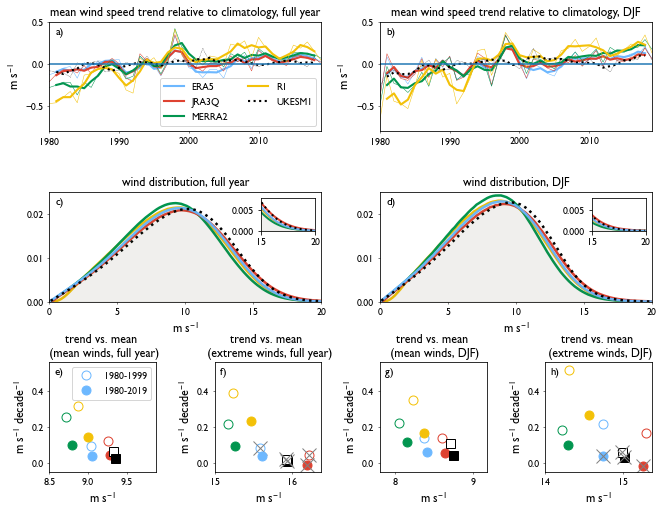

In [33]:
tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
import coldic as cd
reload(cd)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fact = 0.9
fig = plt.figure(figsize=(12*fact, 9.2*fact))
gs = fig.add_gridspec(3, 4, hspace=0.55, wspace=0.55)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[1, 0:2])
ax4 = fig.add_subplot(gs[1, 2:4])
ax5 = fig.add_subplot(gs[2, 0:1])
ax6 = fig.add_subplot(gs[2, 1:2])
ax7 = fig.add_subplot(gs[2, 2])
ax8 = fig.add_subplot(gs[2, 3])

# ### KDEs
prods = ['NCEP-NCAR','MERRA','JRA','ERA5','UKESM',]
ls = [':','-']; al = 0.02
# Create an inset inside ax3 to show extremes
ia3 = inset_axes(ax3, width="20%", height="30%", loc="upper right")  # width and height are relative to ax3
ia4 = inset_axes(ax4, width="20%", height="30%", loc="upper right")


for p in prods:
    tlw = 2.5
    ls = '-'
    if p == 'UKESM':
        ls = ':'
    w = xr.open_dataset(f'{tdir}/KDE-{p}-FY-1980-2019.nc')
    ax3.plot(w.hist_x, w.hist, color = cd.prod[p]['col'], linewidth = tlw, linestyle = ls, label = cd.prod[p]['fnam'])
    ax3.fill_between(w.hist_x, np.zeros_like(w.hist_x.values), w.hist.values, \
                        color = cd.prod[p]['col'], alpha = al, zorder = 20)    
    ia3.plot(w.hist_x, w.hist, color = cd.prod[p]['col'], linewidth = 2, linestyle = ls, label = cd.prod[p]['fnam'])
    ia3.fill_between(w.hist_x, np.zeros_like(w.hist_x.values), w.hist.values, \
                        color = cd.prod[p]['col'], alpha = al, zorder = 20)    
    
    w = xr.open_dataset(f'{tdir}/KDE-{p}-DJF-1980-2019.nc')
    ax4.plot(w.hist_x, w.hist, color = cd.prod[p]['col'], linewidth = tlw, linestyle = ls)
    ax4.fill_between(w.hist_x, np.zeros_like(w.hist_x.values), w.hist.values, \
                        color = cd.prod[p]['col'], alpha = al, zorder = 20)     
    ia4.plot(w.hist_x, w.hist, color = cd.prod[p]['col'], linewidth = 2, linestyle = ls)
    ia4.fill_between(w.hist_x, np.zeros_like(w.hist_x.values), w.hist.values, \
                        color = cd.prod[p]['col'], alpha = al, zorder = 20)    

## timeseries
merra_ts = xr.open_dataset(f'{sdir}/MERRA_40-60S_mean_wspd_ts_1980-2019.nc')
era_ts = xr.open_dataset(f'{sdir}/ERA5_40-60S_mean_wspd_ts_1980-2019.nc')
doe_ts = xr.open_dataset(f'{sdir}/NCEP-DOE_40-60S_mean_wspd_ts_1980-2019.nc')
ncar_ts = xr.open_dataset(f'{sdir}/NCEP-NCAR_40-60S_mean_wspd_ts_1980-2019.nc')
jra_ts = xr.open_dataset(f'{sdir}/JRA_40-60S_mean_wspd_ts_1980-2019.nc')
ukesm_ts = xr.open_dataset(f'{sdir}/UKESMEM_40-60S_mean_wspd_ts_1980-2019.nc')

tn = ['ERA5','JRA','MERRA','NCEP-NCAR','UKESM']
tdar = [era_ts, jra_ts ,merra_ts, ncar_ts, ukesm_ts]


tlw = 2.1
for i in range(0,5):
    
    xmi = 8.25; mar = 2.75
    td = tdar[i]
    a = td.groupby('time_counter.year').mean()
    ts = a.wspd10m - a.wspd10m.mean(); tsv = ts.values
    ax1.plot(a.year,tsv, color = cd.prod[tn[i]]['col'], linestyle = cd.prod[tn[i]]['linestyle'], linewidth = 0.5)
    
    ax1.plot(a.year[1:-1],moving_average(tsv), color = cd.prod[tn[i]]['col'], \
                label = cd.prod[tn[i]]['fnam'], linestyle = cd.prod[tn[i]]['linestyle'], linewidth = tlw)

    a = td.sel(time_counter=(td['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    ts = a.wspd10m - a.wspd10m.mean(); tsv = ts.values
    ax2.plot(a.year,tsv, color = cd.prod[tn[i]]['col'], linestyle = cd.prod[tn[i]]['linestyle'], linewidth = 0.5)
    ax2.plot(a.year[1:-1],moving_average(tsv), color = cd.prod[tn[i]]['col'],\
             linestyle = cd.prod[tn[i]]['linestyle'], linewidth = tlw)
    
    


## trend

# ### mean wind speed---------------------
tdar = [era_ts, jra_ts ,merra_ts, ncar_ts, ukesm_ts]
ms = 9
for i in range(0,5):

    td = tdar[i]
    mkz = 'o'; 
    if tn[i] == 'UKESM': mkz = 's';
    a = td.wspd10m.groupby('time_counter.year').mean().values[0:20]
    wym = np.mean(a)
    mk_slope, mk_p, lin_slope, lin_p = give_trends(a)
    ls = lin_slope*10
    print(f'{tn[i]} FY 1980-1999 {wym}, {ls}, {lin_p}')
    ax5.plot(wym, lin_slope*10, color ='w', marker = mkz, markersize = ms, markeredgecolor = cd.prod[tn[i]]['col'])  
    SW = False; 
    if lin_p > 0.05: SW = True
    if SW: ax5.plot(wym, lin_slope*10, color ='grey', marker = 'x', markersize = ms+5)  
    

    mkz = 'o'; 
    if tn[i] == 'UKESM': mkz = 's';
    a = td.wspd10m.groupby('time_counter.year').mean().values
    wym = np.mean(a)
    mk_slope, mk_p, lin_slope, lin_p = give_trends(a)
    ls = lin_slope*10
    print(f'{tn[i]} FY 1980-2019 {wym}, {ls}, {lin_p}')
    ax5.plot(wym, lin_slope*10, color = cd.prod[tn[i]]['col'], marker = mkz, markersize = ms, markeredgecolor = cd.prod[tn[i]]['col'])  
    SW = False; 
    if lin_p > 0.05: SW = True
    if SW: ax5.plot(wym, lin_slope*10, color ='grey', marker = 'x', markersize = ms+5)  

    ### mean winds, DJF
    mkz = 'o'; 
    if tn[i] == 'UKESM': mkz = 's';
    a = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().values[0:20]
    wym = np.mean(a)
    mk_slope, mk_p, lin_slope, lin_p = give_trends(a)
    ls = lin_slope*10
    print(f'{tn[i]} FY 1980-1999 {wym}, {ls}, {lin_p}')
    ax7.plot(wym, lin_slope*10, color ='w', marker = mkz, markersize = ms, markeredgecolor = cd.prod[tn[i]]['col'])  
    SW = False; 
    if lin_p > 0.05: SW = True
    if SW: ax7.plot(wym, lin_slope*10, color ='grey', marker = 'x', markersize = ms+5)  
    
    mkz = 'o'; 
    if tn[i] == 'UKESM': mkz = 's';
    a = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean().values
    wym = np.mean(a)
    mk_slope, mk_p, lin_slope, lin_p = give_trends(a)
    ls = lin_slope*10
    print(f'{tn[i]} FY 1980-2019 {wym}, {ls}, {lin_p}')
    ax7.plot(wym, lin_slope*10, color = cd.prod[tn[i]]['col'], marker = mkz, markersize = ms, markeredgecolor = cd.prod[tn[i]]['col'])  
    SW = False; 
    if lin_p > 0.05: SW = True
    if SW: ax7.plot(wym, lin_slope*10, color ='grey', marker = 'x', markersize = ms+5)  
    

tdarx = [ERA5ex, JRAex, MERRAex, NCEPNCARex]
for i in range(0,4):
    mkz = 'o'; 
    td = tdarx[i]
    a = td.above95wt.groupby('time_counter.year').mean().values[0:20]
    wym = np.mean(a)
    mk_slope, mk_p, lin_slope, lin_p = give_trends(a)
    ls = lin_slope*10
    print(f'{tn[i]} FY 1980-1999 {wym}, {ls}, {lin_p}')
    ax6.plot(wym, lin_slope*10, color ='w', marker = mkz, markersize = ms, markeredgecolor = cd.prod[tn[i]]['col'])  
    SW = False; 
    if lin_p > 0.05: SW = True
    if SW: ax6.plot(wym, lin_slope*10, color ='grey', marker = 'x', markersize = ms+5)  
    
    a = td.above95wt.groupby('time_counter.year').mean().values[:]
    wym = np.mean(a)
    mk_slope, mk_p, lin_slope, lin_p = give_trends(a)
    ls = lin_slope*10
    print(f'{tn[i]} FY 1980-2019 {wym}, {ls}, {lin_p}')
    ax6.plot(wym, lin_slope*10, color =cd.prod[tn[i]]['col'], marker = mkz, markersize = ms, markeredgecolor = cd.prod[tn[i]]['col'])  
    SW = False; 
    if lin_p > 0.05: SW = True
    if SW: ax6.plot(wym, lin_slope*10, color ='grey', marker = 'x', markersize = ms+5)     
    
    ### DJF
    a = td.sel(time_counter=(td['time_counter.season'] == 'DJF')).above95wt.groupby('time_counter.year').mean().values[0:20]
    wym = np.mean(a)
    mk_slope, mk_p, lin_slope, lin_p = give_trends(a)
    ls = lin_slope*10
    print(f'{tn[i]} FY 1980-1999 {wym}, {ls}, {lin_p}')
    ax8.plot(wym, lin_slope*10, color ='w', marker = mkz, markersize = ms, markeredgecolor = cd.prod[tn[i]]['col'])  
    SW = False; 
    if lin_p > 0.05: SW = True
    if SW: ax8.plot(wym, lin_slope*10, color ='grey', marker = 'x', markersize = ms+5)  
    
    a = td.sel(time_counter=(td['time_counter.season'] == 'DJF')).above95wt.groupby('time_counter.year').mean().values[:]
    wym = np.mean(a)
    mk_slope, mk_p, lin_slope, lin_p = give_trends(a)
    ls = lin_slope*10
    print(f'{tn[i]} FY 1980-2019 {wym}, {ls}, {lin_p}')
    ax8.plot(wym, lin_slope*10, color =cd.prod[tn[i]]['col'], marker = mkz, markersize = ms, markeredgecolor = cd.prod[tn[i]]['col'])  
    SW = False; 
    if lin_p > 0.05: SW = True
    if SW: ax8.plot(wym, lin_slope*10, color ='grey', marker = 'x', markersize = ms+5)    
    
## UKESM gets calculated above and plotted individually 
    
ax6.plot(FYukm_ft, FYukt_ft, color ='k', marker = 's', markersize = ms, markeredgecolor = 'k')  
ax6.plot(FYukm_fh, FYukt_fh, color ='w', marker = 's', markersize = ms, markeredgecolor = 'k')  
ax6.plot(FYukm_ft, FYukt_ft, color ='grey', marker = 'x', markersize = ms+5)  
ax6.plot(FYukm_fh, FYukt_fh, color ='grey', marker = 'x', markersize = ms+5)  

ax8.plot(DJFukm_ft, DJFukt_ft, color ='k', marker = 's', markersize = ms, markeredgecolor = 'k')  
ax8.plot(DJFukm_fh, DJFukt_fh, color ='w', marker = 's', markersize = ms, markeredgecolor = 'k')  
ax8.plot(DJFukm_ft, DJFukt_ft, color ='grey', marker = 'x', markersize = ms+5)  
ax8.plot(DJFukm_fh, DJFukt_fh, color ='grey', marker = 'x', markersize = ms+5)  


ax5.plot(-1, -1, color = 'w', markeredgecolor = cd.prod['ERA5']['col'], marker = 'o', markersize = ms, linewidth = 0, \
        label = '1980-1999')  
ax5.plot(-1, -1, color = cd.prod['ERA5']['col'], linewidth = 0, markeredgecolor = cd.prod['ERA5']['col'], marker = 'o', markersize = ms, \
        label = '1980-2019') 



ax1.set_title('mean wind speed trend relative to climatology, full year', fontproperties=gill_font)
ax2.set_title('mean wind speed trend relative to climatology, DJF', fontproperties=gill_font)
ax3.set_title('wind distribution, full year', fontproperties=gill_font)
ax4.set_title('wind distribution, DJF', fontproperties=gill_font)
ax5.set_title('trend vs. mean \n (mean winds, full year)', fontproperties=gill_font)
ax6.set_title('trend vs. mean \n (extreme winds, full year)', fontproperties=gill_font)
ax7.set_title('trend vs. mean \n (mean winds, DJF)', fontproperties=gill_font)
ax8.set_title('trend vs. mean \n (extreme winds, DJF)', fontproperties=gill_font)

of = 1.38
ax1.set_xlim([1980,2019]); ax1.set_ylim([-0.8,0.5]); ax1.axhline(y=0)
ax2.set_xlim([1980,2019]); ax2.set_ylim([-0.8,0.5]); ax2.axhline(y=0)
ax3.set_ylim([0,0.025]); ax3.set_xlim([0,20])
ax4.set_ylim([0,0.025]); ax4.set_xlim([0,20]);  
ax5.set_ylim([-0.05,0.56]); ax5.set_xlim([8.5,8.5+of])
ax6.set_ylim([-0.05,0.56]); ax6.set_xlim([15,15+of])
ax7.set_ylim([-0.05,0.56]); ax7.set_xlim([7.8,7.8+of])
ax8.set_ylim([-0.05,0.56]); ax8.set_xlim([14,14+of])
ia3.set_xlim([15,20]);ia3.set_ylim([0,0.008])
ia4.set_xlim([15,20]);ia4.set_ylim([0,0.008])

grid = False
if grid:
    axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax6, ax7, ax8, ia3, ia4]
    for ax in axs:
        ax.grid(linestyle = ':', color = 'grey', alpha = 0.8)

axs = [ax1, ax2]
for ax in axs: ax.set_ylabel('m s$^{-1}$', fontproperties=gill_font)
axs = [ax3, ax4, ax5, ax6, ax7, ax8]
for ax in axs: ax.set_xlabel('m s$^{-1}$', fontproperties=gill_font)
axs = [ax5, ax6, ax7, ax8]
for ax in axs: ax.set_ylabel('m s$^{-1}$ decade$^{-1}$', fontproperties=gill_font)

fs = 11
ax1.text(0.025, 0.95, 'a)', transform=ax1.transAxes, fontsize=fs, va='top', ha='left', fontproperties=gill_font)
ax2.text(0.025, 0.95, 'b)', transform=ax2.transAxes, fontsize=fs, va='top', ha='left', fontproperties=gill_font)
ax3.text(0.025, 0.95, 'c)', transform=ax3.transAxes, fontsize=fs, va='top', ha='left', fontproperties=gill_font)
ax4.text(0.025, 0.95, 'd)', transform=ax4.transAxes, fontsize=fs, va='top', ha='left', fontproperties=gill_font)
ax5.text(0.05, 0.95, 'e)', transform=ax5.transAxes, fontsize=fs, va='top', ha='left', fontproperties=gill_font)
ax6.text(0.05, 0.95, 'f)', transform=ax6.transAxes, fontsize=fs, va='top', ha='left', fontproperties=gill_font)
ax7.text(0.05, 0.95, 'g)', transform=ax7.transAxes, fontsize=fs, va='top', ha='left', fontproperties=gill_font)
ax8.text(0.05, 0.95, 'h)', transform=ax8.transAxes, fontsize=fs, va='top', ha='left', fontproperties=gill_font)
       

    
gill_font_small = gill_font.copy()
gill_font_small.set_size(11)

    
gill_font_esmall = gill_font.copy()
gill_font_esmall.set_size(10)

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ia3, ia4]
for ax in axs:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(gill_font_esmall)
        
ax1.legend(loc = 'best', ncol = 2, prop=gill_font_esmall)
ax5.legend(loc = 'best', ncol = 1, prop=gill_font_esmall)
        
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    ax.tick_params(axis='both', length=2, width=0.5, direction='out')
    
plt.tight_layout()
fig.savefig('./plts-gill/Fig-mean-extreme.jpg', dpi = 300, bbox_inches='tight')

# IAV

In [27]:
merra_ts = xr.open_dataset(f'{sdir}/MERRA_40-60S_mean_wspd_ts_1980-2019.nc')
era_ts = xr.open_dataset(f'{sdir}/ERA5_40-60S_mean_wspd_ts_1980-2019.nc')
doe_ts = xr.open_dataset(f'{sdir}/NCEP-DOE_40-60S_mean_wspd_ts_1980-2019.nc')
ncar_ts = xr.open_dataset(f'{sdir}/NCEP-NCAR_40-60S_mean_wspd_ts_1980-2019.nc')
ukesm_ts = xr.open_dataset(f'{sdir}/UKESM_40-60S_mean_wspd_ts_1980-2019.nc')
jra_ts = xr.open_dataset(f'{sdir}/JRA_40-60S_mean_wspd_ts_1980-2019.nc')

dss = ['NCEP-NCAR','NCEP-DOE','MERRA','JRA3Q','ERA5','UKESM']
tdar = [ncar_ts, doe_ts, merra_ts, jra_ts, era_ts,   ukesm_ts]

data = np.zeros([5,6])
sig = np.zeros([5,6])
for i in range(0,6):
    print(dss[i])
    ds = dss[i]
    
    tdat = tdar[i]
    td = tdat
    td = td.wspd10m.groupby('time_counter.year').mean().values
    #print(td)
    w = np.std(td)
    print(w)
    m = np.mean(td)
    # print
    # mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[0,i] = (w/m)*100
#     sig[0,i] = lin_p
    

    td = tdat
    td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'DJF')).\
    groupby('time_counter.year').mean().values
    w = np.std(td)
    m = np.mean(td)
    data[1,i] = (w/m)*100
#     sig[0,i] = lin_p

    td = tdat
    td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'MAM')).\
    groupby('time_counter.year').mean().values
    w = np.std(td)
    m = np.mean(td)
    data[2,i] = (w/m)*100

    td = tdat
    td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'JJA')).\
    groupby('time_counter.year').mean().values
    w = np.std(td)
    m = np.mean(td)
    data[3,i] = (w/m)*100
    
    td = tdat
    td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'SON')).\
    groupby('time_counter.year').mean().values
    w = np.std(td)
    m = np.mean(td)
    data[4,i] = (w/m)*100
    
        
    i = i+1
    

df = pd.DataFrame(data, columns=['NCEP-NCAR','NCEP-DOE','MERRA','JRA3Q','ERA5','UKESM'],\
                  index  = ['full year','DJF','MAM', 'JJA', 'SON',])
# df2 = pd.DataFrame(sig, columns=['NCEP-NCAR','NCEP-DOE','MERRA','JRA3Q','ERA5','UKESM'],\
#                   index  = ['full year','DJF','MAM', 'JJA', 'SON',])

df.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
df.to_csv(f'./plts/IAV_1980-2019.csv')
# df2.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
# df2.to_csv(f'./plts/mn_wspd_trendsig-1980-2019.csv')

print(df)


NCEP-NCAR
0.217999370477673
NCEP-DOE
0.2765281476665015
MERRA
0.15796505083815376
JRA3Q
0.10460371851262593
ERA5
0.1069408240942777
UKESM
0.09888093720233063
           NCEP-NCAR  NCEP-DOE     MERRA     JRA3Q      ERA5     UKESM
full year   2.421584  2.669251  1.795481  1.126662  1.181409  1.056370
DJF         3.054685  3.099408  2.203538  1.581987  1.668828  1.451707
MAM         2.737487  3.103465  2.227737  1.415912  1.348500  1.451798
JJA         2.686941  2.964191  2.197969  1.686346  1.719746  1.500227
SON         2.836364  3.022472  2.072205  1.758973  1.944595  1.804273
